# Diabetes Prediction

* Understanding Business Problem and getting data.
* Visualizing the data.
* Feature Engineering
* Training Basic and Advance Models.
* Creating HTML+CSS layout.
* Deploying Model with Flask.





* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)²)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

In [2]:
# set seed for reproducibility
SEED = 20
np.random.seed(SEED)

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print('Total zero Glucose values: ' + str(768-df['Glucose'].astype(bool).sum(axis=0)))
print('Total zero BloodPressure values: ' + str(768-df['BloodPressure'].astype(bool).sum(axis=0)))
print('Total zero SkinThickness values: ' + str(768-df['SkinThickness'].astype(bool).sum(axis=0)))
print('Total zero Insulin values: ' + str(768-df['Insulin'].astype(bool).sum(axis=0)))
print('Total zero BMI values: ' + str(768-df['BMI'].astype(bool).sum(axis=0)))
print('Total zero DiabetesPedigreeFunction values: ' + str(768-df['DiabetesPedigreeFunction'].astype(bool).sum(axis=0)))
print('Total zero Age values: ' + str(768-df['Age'].astype(bool).sum(axis=0)))
# These are all 0 values out of 768 in each field.
# We saw outliers during our data viz. Now we need to handle these
# Total zero values in DiabetesPedigreeFunction and Age variable is zero.
# Pregnancy field can be 0.

Total zero Glucose values: 5
Total zero BloodPressure values: 35
Total zero SkinThickness values: 227
Total zero Insulin values: 374
Total zero BMI values: 11
Total zero DiabetesPedigreeFunction values: 0
Total zero Age values: 0


In [5]:
# Replacing all 0 values with Null values
def replace_zero(df):
    df_nan=df.copy(deep=True)
    cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
    df_nan[cols] = df_nan[cols].replace({0:np.nan})
    return df_nan
df_nan=replace_zero(df)

In [6]:
def find_median(frame,var):
    temp = frame[frame[var].notnull()]
    temp = frame[[var,'Outcome']].groupby('Outcome')[[var]].median().reset_index()
    return temp

In [7]:
# Now we need to handle Nulls somehow
# to find the median for filling null values
# Function outputs median value for mentioned variable based on Outcome var
def replace_null(frame,var):
    median_df=find_median(frame,var)
    var_0=median_df[var].iloc[0]
    var_1=median_df[var].iloc[1]
    frame.loc[(frame['Outcome'] == 0) & (frame[var].isnull()), var] = var_0
    frame.loc[(frame['Outcome'] == 1) & (frame[var].isnull()), var] = var_1
    return frame[var].isnull().sum()

In [8]:
print(str(replace_null(df_nan,'Glucose'))+ ' Nulls for Glucose')
print(str(replace_null(df_nan,'SkinThickness'))+ ' Nulls for SkinThickness')
print(str(replace_null(df_nan,'Insulin'))+ ' Nulls for Insulin')
print(str(replace_null(df_nan,'BMI'))+ ' Nulls for BMI')
print(str(replace_null(df_nan,'BloodPressure'))+ ' Nulls for BloodPressure')
# We have successfully handled Nulls

0 Nulls for Glucose
0 Nulls for SkinThickness
0 Nulls for Insulin
0 Nulls for BMI
0 Nulls for BloodPressure


In [9]:

df_nan.isnull().sum()
# Just a confirmation
# Everything looks good

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Data Visualization

In [10]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls

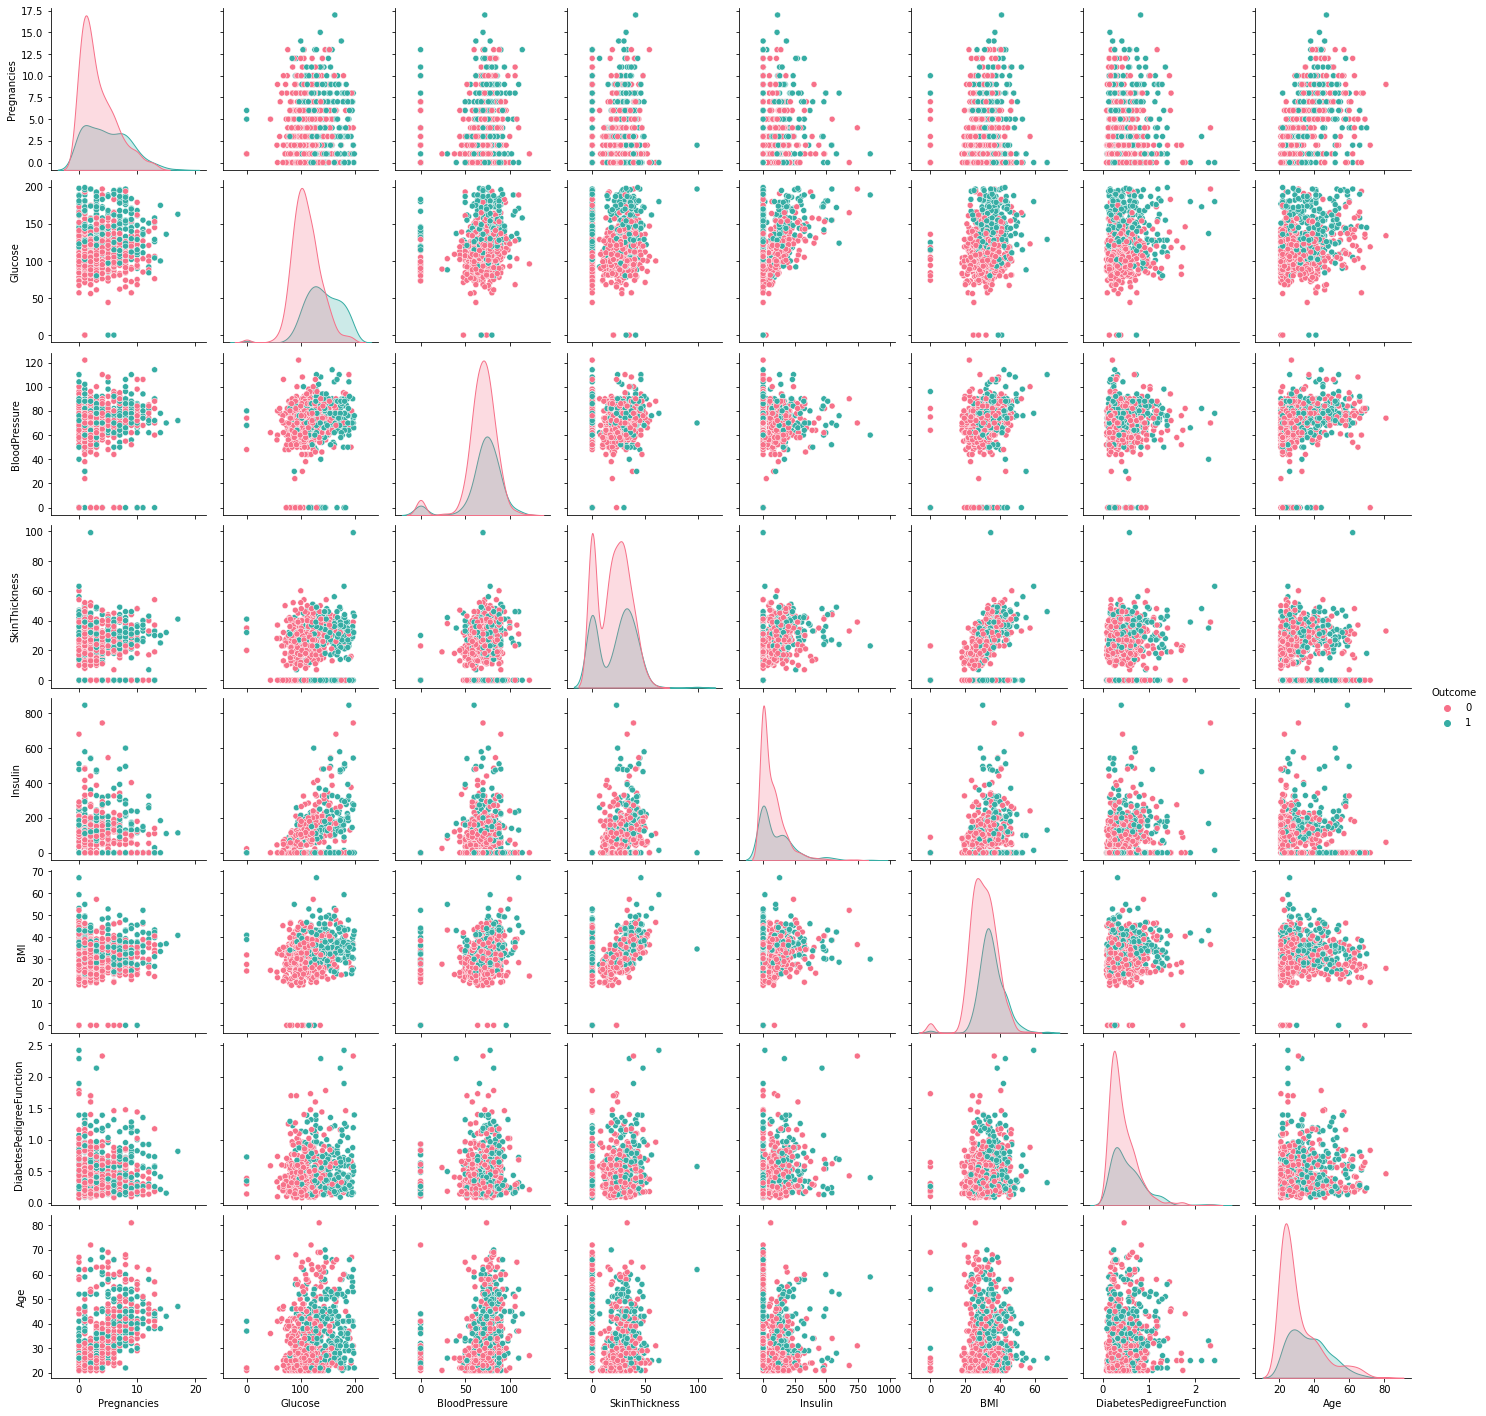

In [11]:
sns.pairplot(df, hue="Outcome", palette="husl")
# Looks like data sufferes from some outfiers

### UNIVARIATE and BIVARIATE ANALYSIS

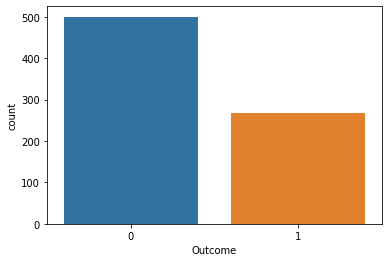

In [12]:
sns.countplot(x='Outcome',data=df)
plt.show()
# We have imbalanced dataset with non-diabetic people more than diabetic people

In [13]:
df['Outcome'].value_counts()
# So we have 500 non-diabetic and 268 diabetic patients

0    500
1    268
Name: Outcome, dtype: int64

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0, 0.5, 'Freq/Dist')

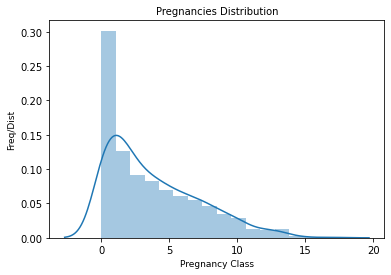

In [14]:
plt = sns.distplot(df['Pregnancies'])
plt.set_title('Pregnancies Distribution',fontdict={'fontsize':10})
plt.set_xlabel('Pregnancy Class',fontdict={'fontsize':9})
plt.set_ylabel('Freq/Dist',fontdict={'fontsize':9})
# We have right skewed plot for pregnancy

In [15]:
df['Pregnancies'].value_counts()
# 17 pregnancies looks like an outlier

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

[]

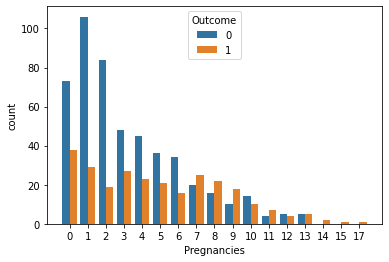

In [16]:
sns.countplot(x='Pregnancies',data=df, hue= 'Outcome').plot()


In [17]:
# Defining a function for our plot1 which we will use for our other variables as well 
# This plot is for distribution of the varibale
def plot1(data):
    plt1 = sns.distplot(data)
    plt1.set_title(data.name +' Distribution',fontdict={'fontsize':10})
    plt1.set_xlabel(data.name +' Class',fontdict={'fontsize':9})
    plt1.set_ylabel('Count/Dist',fontdict={'fontsize':9})

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



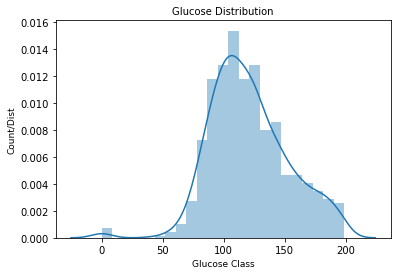

In [18]:
plot1(df['Glucose'])

In [19]:
# Lets consider varibale with Diabetic vs Non-Diabetic condition
def plot2(frame,var):
    plt2=sns.distplot(frame[frame.Outcome==False][var.name],color='green',label='Non-Diabetic')
    sns.distplot(frame[frame.Outcome==True][var.name],color='red',label='Diabetic')
    plt2.set_title('Distribution of '+var.name,fontdict={'fontsize':10})
    plt2.set_xlabel(var.name,fontdict={'fontsize':9})
    plt2.set_ylabel('Count/Dist.',fontdict={'fontsize':9})
    plt2.axes.legend(loc=0)

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



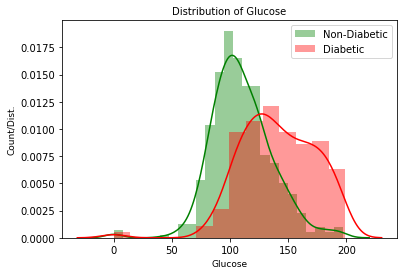

In [20]:
plot2(df,df['Glucose'])
# Clearly diabetic and non diabetic patient's glucose level are overlapping between 90-120 approx

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



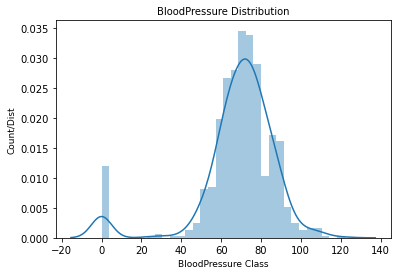

In [21]:
# Repeating above for other variables
plot1(df['BloodPressure'])
# Here clearly we can see outliers at 0

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



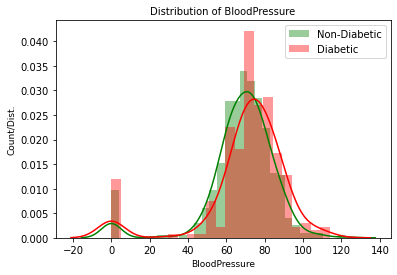

In [22]:
plot2(df,df['BloodPressure'])
# Thats almost complete overlapping.

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



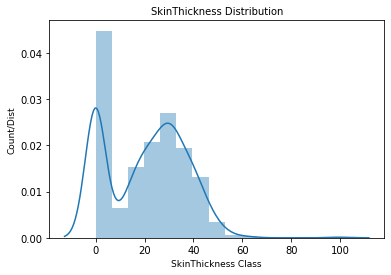

In [23]:
# Same plot for skin thickness
plot1(df['SkinThickness'])

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



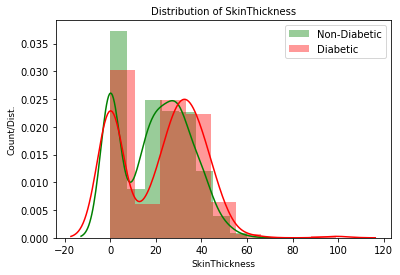

In [24]:
plot2(df,df['SkinThickness'])

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



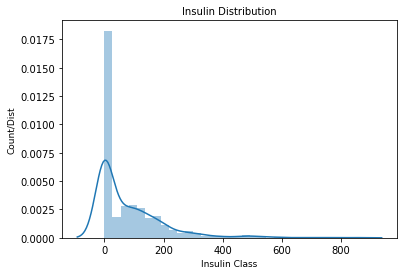

In [25]:
plot1(df['Insulin'])
# Insulin follows almost power law distribution
# Maximum values are 0

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



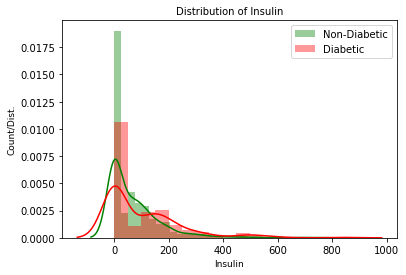

In [26]:
plot2(df,df['Insulin'])

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



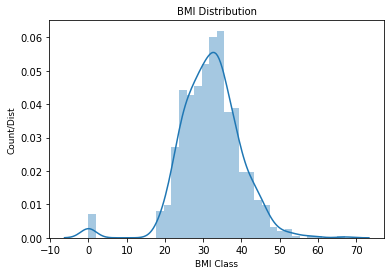

In [27]:
plot1(df['BMI'])

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



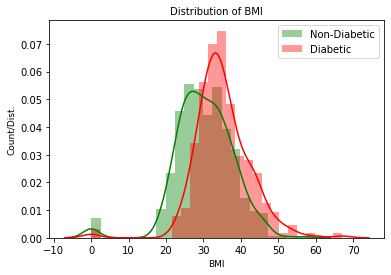

In [28]:
plot2(df,df['BMI'])

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



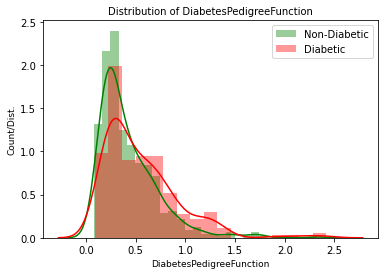

In [29]:
plot2(df,df['DiabetesPedigreeFunction'])

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



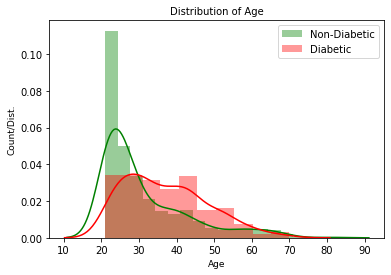

In [30]:
plot2(df,df['Age'])
# This can be a good observation
# People between 40-50 are more prone to diab as total no. of people in that age group are less

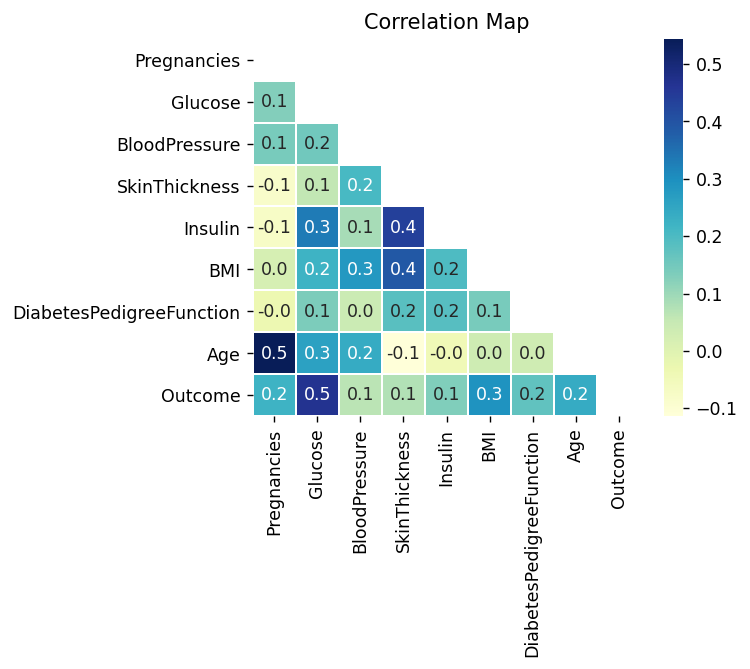

In [31]:
from matplotlib import figure
import pylab as pl
pl.figure(dpi = 125,figsize= (5,4))
mask = np.triu(df.corr())
#np.triu returns lower triangle for our heatmap as we do not need upper map
sns.heatmap(df.corr(),mask = mask, fmt = ".1f",annot=True,lw=0.1,cmap = 'YlGnBu')
pl.title('Correlation Map')
pl.show()
# Considering out outcome variable, skinthickness and insulin are least correlated
# Other varibles are also not much correlated.
# One thing that we can make through this is that, we cannot linearly seperate our data

## Feature Engineering

In [32]:
# We need to scale our data for uniformity.
from sklearn.preprocessing import StandardScaler
def std_scalar(df):
    std_X = StandardScaler()
    x =  pd.DataFrame(std_X.fit_transform(df.drop(["Outcome"],axis = 1),),
            columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age'])
    y=df["Outcome"]
    return x,y

In [33]:
X,Y=std_scalar(df_nan)
X.describe()
# Scaled data looks fine

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,1.480297e-16,-3.978299e-16,8.095376e-18,-3.469447e-18,1.318390e-16,2.451743e-16,1.931325e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-2.551447e+00,-3.999727e+00,-2.486187e+00,-1.434747e+00,-2.070186e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-7.202356e-01,-6.934382e-01,-4.603073e-01,-4.408430e-01,-7.176590e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.536274e-01,-3.218035e-02,-1.226607e-01,-4.408430e-01,-5.593870e-02,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.100618e-01,6.290775e-01,3.275348e-01,3.116039e-01,6.057816e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.539814e+00,4.100681e+00,7.868309e+00,7.909072e+00,5.041489e+00,5.883565e+00,4.063716e+00


In [34]:
#Keeping train  size as 0.8
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=20, stratify=Y)

In [35]:
# We are good to go with baseline model
# Let's first implement KNN
from sklearn.neighbors import KNeighborsClassifier
test_scores = []
train_scores = []
for i in range(5,15):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, Y_train)
    train_scores.append(neigh.score(X_train,Y_train))
    test_scores.append(neigh.score(X_test,Y_test))

In [36]:
print('Max train_scores is ' + str(max(train_scores)*100) + ' for k = '+ 
      str(train_scores.index(max(train_scores))+5))

Max train_scores is 85.66775244299674 for k = 5


In [37]:
print('Max test_scores is ' + str(max(test_scores)*100) + ' for k = '+ 
      str(test_scores.index(max(test_scores))+5))
# K=13 has generalized well for our data.

Max test_scores is 87.01298701298701 for k = 13


In [38]:
# Lets try Logistic regression now
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=20, penalty='l2').fit(X_train, Y_train)
log_pred=log_model.predict(X_test)
log_model.score(X_test, Y_test)

0.8311688311688312

In [39]:
# Support Vector Machines
from sklearn import svm
svm_model = svm.SVC().fit(X_train, Y_train)
svm_pred=svm_model.predict(X_test)
svm_model.score(X_test, Y_test)
# Almost 89% Accuracy

0.8896103896103896

In [40]:
# Function to evaluate model performance
def model_perf(pred,Y_test):
    cmp_list=[]
    for i,j in zip(pred,Y_test):
        if i==j:
            cmp_list.append(1)
        else:
            cmp_list.append(0)
    return cmp_list

In [41]:
cmp_list=model_perf(svm_pred,Y_test)

In [42]:
print('Model Accuracy Confirmation :'+ str(cmp_list.count(1)/len(Y_test)))

Model Accuracy Confirmation :0.8896103896103896


In [43]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=2, random_state=20).fit(X_train, Y_train)
rf_pred=rf_model.predict(X_test)
rf_model.score(X_test, Y_test)
# Almost 86% Accuracy

0.8571428571428571

In [44]:
import tensorflow as tf
def build_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=[len(X_train.keys())]),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

neural_model = build_model()

In [45]:
neural_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [46]:
# Keeping EPOCHs high as dataset is small.
EPOCHS =500
neural_pred = neural_model.fit(X_train, Y_train,epochs=EPOCHS, validation_split=0.1, verbose=2)

Epoch 1/500
18/18 - 1s - loss: 0.6694 - accuracy: 0.7029 - val_loss: 0.6059 - val_accuracy: 0.8548
Epoch 2/500
18/18 - 0s - loss: 0.6141 - accuracy: 0.7989 - val_loss: 0.5540 - val_accuracy: 0.8548
Epoch 3/500
18/18 - 0s - loss: 0.5793 - accuracy: 0.8116 - val_loss: 0.5121 - val_accuracy: 0.8387
Epoch 4/500
18/18 - 0s - loss: 0.5579 - accuracy: 0.7808 - val_loss: 0.4728 - val_accuracy: 0.8548
Epoch 5/500
18/18 - 0s - loss: 0.5203 - accuracy: 0.8134 - val_loss: 0.4370 - val_accuracy: 0.8710
Epoch 6/500
18/18 - 0s - loss: 0.4913 - accuracy: 0.8243 - val_loss: 0.3940 - val_accuracy: 0.9032
Epoch 7/500
18/18 - 0s - loss: 0.4662 - accuracy: 0.8388 - val_loss: 0.3694 - val_accuracy: 0.9516
Epoch 8/500
18/18 - 0s - loss: 0.4503 - accuracy: 0.8460 - val_loss: 0.3433 - val_accuracy: 0.9194
Epoch 9/500
18/18 - 0s - loss: 0.4324 - accuracy: 0.8442 - val_loss: 0.3285 - val_accuracy: 0.9032
Epoch 10/500
18/18 - 0s - loss: 0.4024 - accuracy: 0.8678 - val_loss: 0.3048 - val_accuracy: 0.9355
Epoch 11/

Epoch 84/500
18/18 - 0s - loss: 0.2218 - accuracy: 0.9366 - val_loss: 0.2250 - val_accuracy: 0.9355
Epoch 85/500
18/18 - 0s - loss: 0.2241 - accuracy: 0.9239 - val_loss: 0.2252 - val_accuracy: 0.9355
Epoch 86/500
18/18 - 0s - loss: 0.2258 - accuracy: 0.9185 - val_loss: 0.2384 - val_accuracy: 0.9355
Epoch 87/500
18/18 - 0s - loss: 0.2347 - accuracy: 0.9130 - val_loss: 0.2303 - val_accuracy: 0.9355
Epoch 88/500
18/18 - 0s - loss: 0.2397 - accuracy: 0.9167 - val_loss: 0.2119 - val_accuracy: 0.9355
Epoch 89/500
18/18 - 0s - loss: 0.2258 - accuracy: 0.9275 - val_loss: 0.2346 - val_accuracy: 0.9194
Epoch 90/500
18/18 - 0s - loss: 0.2251 - accuracy: 0.9293 - val_loss: 0.2456 - val_accuracy: 0.9194
Epoch 91/500
18/18 - 0s - loss: 0.2162 - accuracy: 0.9312 - val_loss: 0.2178 - val_accuracy: 0.9194
Epoch 92/500
18/18 - 0s - loss: 0.2172 - accuracy: 0.9330 - val_loss: 0.2236 - val_accuracy: 0.9355
Epoch 93/500
18/18 - 0s - loss: 0.2151 - accuracy: 0.9312 - val_loss: 0.2207 - val_accuracy: 0.9194


Epoch 166/500
18/18 - 0s - loss: 0.1942 - accuracy: 0.9293 - val_loss: 0.1904 - val_accuracy: 0.9194
Epoch 167/500
18/18 - 0s - loss: 0.1909 - accuracy: 0.9348 - val_loss: 0.1856 - val_accuracy: 0.9194
Epoch 168/500
18/18 - 0s - loss: 0.1904 - accuracy: 0.9312 - val_loss: 0.1860 - val_accuracy: 0.9194
Epoch 169/500
18/18 - 0s - loss: 0.1913 - accuracy: 0.9330 - val_loss: 0.1829 - val_accuracy: 0.9194
Epoch 170/500
18/18 - 0s - loss: 0.1913 - accuracy: 0.9312 - val_loss: 0.1732 - val_accuracy: 0.9355
Epoch 171/500
18/18 - 0s - loss: 0.1985 - accuracy: 0.9275 - val_loss: 0.1870 - val_accuracy: 0.9194
Epoch 172/500
18/18 - 0s - loss: 0.1936 - accuracy: 0.9348 - val_loss: 0.1844 - val_accuracy: 0.9355
Epoch 173/500
18/18 - 0s - loss: 0.1905 - accuracy: 0.9312 - val_loss: 0.1799 - val_accuracy: 0.9355
Epoch 174/500
18/18 - 0s - loss: 0.1923 - accuracy: 0.9330 - val_loss: 0.2107 - val_accuracy: 0.9355
Epoch 175/500
18/18 - 0s - loss: 0.2078 - accuracy: 0.9293 - val_loss: 0.1657 - val_accurac

18/18 - 0s - loss: 0.1758 - accuracy: 0.9402 - val_loss: 0.1413 - val_accuracy: 0.9677
Epoch 248/500
18/18 - 0s - loss: 0.1744 - accuracy: 0.9438 - val_loss: 0.1401 - val_accuracy: 0.9677
Epoch 249/500
18/18 - 0s - loss: 0.1778 - accuracy: 0.9438 - val_loss: 0.1428 - val_accuracy: 0.9677
Epoch 250/500
18/18 - 0s - loss: 0.1748 - accuracy: 0.9420 - val_loss: 0.1365 - val_accuracy: 0.9677
Epoch 251/500
18/18 - 0s - loss: 0.1749 - accuracy: 0.9384 - val_loss: 0.1404 - val_accuracy: 0.9677
Epoch 252/500
18/18 - 0s - loss: 0.1770 - accuracy: 0.9402 - val_loss: 0.1576 - val_accuracy: 0.9516
Epoch 253/500
18/18 - 0s - loss: 0.1765 - accuracy: 0.9457 - val_loss: 0.1422 - val_accuracy: 0.9677
Epoch 254/500
18/18 - 0s - loss: 0.1750 - accuracy: 0.9402 - val_loss: 0.1460 - val_accuracy: 0.9677
Epoch 255/500
18/18 - 0s - loss: 0.1738 - accuracy: 0.9438 - val_loss: 0.1600 - val_accuracy: 0.9677
Epoch 256/500
18/18 - 0s - loss: 0.1759 - accuracy: 0.9384 - val_loss: 0.1400 - val_accuracy: 0.9677
Epoc

Epoch 329/500
18/18 - 0s - loss: 0.1741 - accuracy: 0.9384 - val_loss: 0.1128 - val_accuracy: 0.9839
Epoch 330/500
18/18 - 0s - loss: 0.1799 - accuracy: 0.9420 - val_loss: 0.1139 - val_accuracy: 0.9839
Epoch 331/500
18/18 - 0s - loss: 0.1768 - accuracy: 0.9438 - val_loss: 0.1182 - val_accuracy: 0.9839
Epoch 332/500
18/18 - 0s - loss: 0.1723 - accuracy: 0.9384 - val_loss: 0.1139 - val_accuracy: 0.9839
Epoch 333/500
18/18 - 0s - loss: 0.1756 - accuracy: 0.9420 - val_loss: 0.1192 - val_accuracy: 0.9839
Epoch 334/500
18/18 - 0s - loss: 0.1731 - accuracy: 0.9366 - val_loss: 0.1193 - val_accuracy: 0.9839
Epoch 335/500
18/18 - 0s - loss: 0.1721 - accuracy: 0.9420 - val_loss: 0.1112 - val_accuracy: 0.9839
Epoch 336/500
18/18 - 0s - loss: 0.1730 - accuracy: 0.9402 - val_loss: 0.1139 - val_accuracy: 0.9839
Epoch 337/500
18/18 - 0s - loss: 0.1731 - accuracy: 0.9384 - val_loss: 0.1147 - val_accuracy: 0.9839
Epoch 338/500
18/18 - 0s - loss: 0.1765 - accuracy: 0.9457 - val_loss: 0.1097 - val_accurac

Epoch 411/500
18/18 - 0s - loss: 0.1843 - accuracy: 0.9366 - val_loss: 0.1490 - val_accuracy: 0.9677
Epoch 412/500
18/18 - 0s - loss: 0.1834 - accuracy: 0.9348 - val_loss: 0.1494 - val_accuracy: 0.9677
Epoch 413/500
18/18 - 0s - loss: 0.1848 - accuracy: 0.9402 - val_loss: 0.1467 - val_accuracy: 0.9677
Epoch 414/500
18/18 - 0s - loss: 0.1823 - accuracy: 0.9348 - val_loss: 0.1486 - val_accuracy: 0.9677
Epoch 415/500
18/18 - 0s - loss: 0.1832 - accuracy: 0.9384 - val_loss: 0.1507 - val_accuracy: 0.9677
Epoch 416/500
18/18 - 0s - loss: 0.1928 - accuracy: 0.9420 - val_loss: 0.1526 - val_accuracy: 0.9677
Epoch 417/500
18/18 - 0s - loss: 0.1868 - accuracy: 0.9312 - val_loss: 0.1492 - val_accuracy: 0.9677
Epoch 418/500
18/18 - 0s - loss: 0.1840 - accuracy: 0.9366 - val_loss: 0.1491 - val_accuracy: 0.9677
Epoch 419/500
18/18 - 0s - loss: 0.1879 - accuracy: 0.9330 - val_loss: 0.1486 - val_accuracy: 0.9677
Epoch 420/500
18/18 - 0s - loss: 0.1863 - accuracy: 0.9330 - val_loss: 0.1496 - val_accurac

Epoch 493/500
18/18 - 0s - loss: 0.2056 - accuracy: 0.9257 - val_loss: 0.1581 - val_accuracy: 0.9516
Epoch 494/500
18/18 - 0s - loss: 0.2022 - accuracy: 0.9293 - val_loss: 0.1570 - val_accuracy: 0.9677
Epoch 495/500
18/18 - 0s - loss: 0.2203 - accuracy: 0.9257 - val_loss: 0.1588 - val_accuracy: 0.9677
Epoch 496/500
18/18 - 0s - loss: 0.2037 - accuracy: 0.9312 - val_loss: 0.1490 - val_accuracy: 0.9516
Epoch 497/500
18/18 - 0s - loss: 0.2031 - accuracy: 0.9293 - val_loss: 0.1566 - val_accuracy: 0.9677
Epoch 498/500
18/18 - 0s - loss: 0.2118 - accuracy: 0.9293 - val_loss: 0.1607 - val_accuracy: 0.9677
Epoch 499/500
18/18 - 0s - loss: 0.2065 - accuracy: 0.9257 - val_loss: 0.1593 - val_accuracy: 0.9677
Epoch 500/500
18/18 - 0s - loss: 0.2096 - accuracy: 0.9312 - val_loss: 0.1558 - val_accuracy: 0.9677


In [47]:
# Let's measure final performance
hist = pd.DataFrame(neural_pred.history)
hist['epoch'] = neural_pred.epoch
hist.tail()
# 91% accuracy on train

,loss,accuracy,val_loss,val_accuracy,epoch
495,0.203677,0.931159,0.149049,0.951613,495
496,0.203053,0.929348,0.156627,0.967742,496
497,0.211769,0.929348,0.160674,0.967742,497
498,0.206538,0.925725,0.159328,0.967742,498
499,0.209560,0.931159,0.155843,0.967742,499


In [48]:
neural_test=neural_model.predict(X_test)

In [49]:
neural_test_converted=[]
for i in neural_test:
    if i>0.5:
        neural_test_converted.append(1)
    else:
        neural_test_converted.append(0)

In [50]:
cmp_list=model_perf(neural_test_converted,Y_test)

In [51]:
print('Test Accuracy :' + str(cmp_list.count(1)/len(Y_test)*100)+' %')
#~78% Accuracy.

Test Accuracy :77.92207792207793 %


In [52]:
import pickle
# Lets dump our SVM model
pickle.dump(svm_model, open('svm_model.pkl','wb'))

### Model which was finalized for deployment was SVM as it had highest accuracy for test data.

We will communicate with show.html file from our main file with just “{{ }}”or"/send". Whatever data you need to send after your analysis on your web page just uses brackets and you are done; your results will now render. 

## Deploying Model With Flask

In [53]:
from flask import Flask, render_template, request
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [54]:
app = Flask(__name__)
svm_model=pickle.load(open('svm_model.pkl','rb'))

@app.route('/')
def home():
    return render_template("home.html")

In [55]:
def std_scalar(df):
    std_X = StandardScaler()
    x =  pd.DataFrame(std_X.fit_transform(df))
    return x

def pipeline(features):
    steps = [('scaler', StandardScaler()), ('SVM', svm_model)]
    pipe = Pipeline(steps)
    return pipe.fit_transform(features)



In [56]:

@app.route('/send', methods=['POST'])
def getdata():

    features = [float() for x in request.form.values()]
    final_features = [np.array(features)]

    #Feature tranform and prediction using pipeline
    # We can now use predictions from this feature_tranformed variable
    #feature_tranformed= pipeline(final_features)


    feature_transform=std_scalar(final_features)
    # Using standard scalar method
    prediction = svm_model.predict(feature_transform)
    if prediction==0:
        result="You Are Non-Diabetic"
    else:
        result="You Are Diabetic"

    Pregnancies=request.form['Pregnancies']
    Glucose = request.form['Glucose']
    BloodPressure = request.form['BloodPressure']
    SkinThickness = request.form['SkinThickness']
    Insulin = request.form['Insulin']
    BMI = request.form['BMI']
    DiabetesPedigreeFunction = request.form['DiabetesPedigreeFunction']
    Age = request.form['Age']
    return render_template('show.html', preg=Pregnancies, bp=BloodPressure,
                           gluc=Glucose, st=SkinThickness, ins=Insulin, bmi=BMI,
                           dbf=DiabetesPedigreeFunction, age=Age, res=result)



In [ ]:

if __name__=="__main__":
    app.run(debug=True,use_reloader=False)

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [31/May/2021 14:52:39] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [31/May/2021 14:52:40] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [31/May/2021 14:53:48] "POST /send HTTP/1.1" 200 -
